<a href="https://colab.research.google.com/github/AmanSinghal07/PraxisProjects/blob/main/Rainfall_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files


uploaded = files.upload()

Saving weatherAUS.csv to weatherAUS.csv


In [3]:
df=pd.read_csv('weatherAUS.csv')

In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [7]:
df.isnull().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [8]:
df2=df.copy()

In [9]:
df2.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [10]:
df2.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm'],axis=1,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   WindGustDir    135134 non-null  object 
 6   WindGustSpeed  135197 non-null  float64
 7   WindDir9am     134894 non-null  object 
 8   WindDir3pm     141232 non-null  object 
 9   WindSpeed9am   143693 non-null  float64
 10  WindSpeed3pm   142398 non-null  float64
 11  Humidity9am    142806 non-null  float64
 12  Humidity3pm    140953 non-null  float64
 13  Pressure9am    130395 non-null  float64
 14  Pressure3pm    130432 non-null  float64
 15  Temp9am        143693 non-null  float64
 16  Temp3pm        141851 non-null  float64
 17  RainToday      142199 non-nul

In [13]:
df2.isnull().sum()*100/len(df2)

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [14]:
numerical_feature = [feature for feature in df2.columns if df2[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df2[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df2.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 12
Discrete feature Count 0
Continuous feature Count 12
Categorical feature Count 7


In [15]:
for feature in continuous_feature:
    if(df2[feature].isnull().sum()*100/len(df2))>0:
        df2[feature] = df2[feature].fillna(df2[feature].median())

In [16]:
df2.isnull().sum()*100/len(df2)

Date             0.000000
Location         0.000000
MinTemp          0.000000
MaxTemp          0.000000
Rainfall         0.000000
WindGustDir      7.098859
WindGustSpeed    0.000000
WindDir9am       7.263853
WindDir3pm       2.906641
WindSpeed9am     0.000000
WindSpeed3pm     0.000000
Humidity9am      0.000000
Humidity3pm      0.000000
Pressure9am      0.000000
Pressure3pm      0.000000
Temp9am          0.000000
Temp3pm          0.000000
RainToday        2.241853
RainTomorrow     2.245978
dtype: float64

In [17]:
df2["WindGustDir"] = df2["WindGustDir"].fillna(df2["WindGustDir"].value_counts().index[0])
df2["WindDir9am"] = df2["WindDir9am"].fillna(df2["WindDir9am"].value_counts().index[0])
df2["WindDir3pm"] = df2["WindDir3pm"].fillna(df2["WindDir3pm"].value_counts().index[0])

In [18]:
df2.isnull().sum()*100/len(df2)

Date             0.000000
Location         0.000000
MinTemp          0.000000
MaxTemp          0.000000
Rainfall         0.000000
WindGustDir      0.000000
WindGustSpeed    0.000000
WindDir9am       0.000000
WindDir3pm       0.000000
WindSpeed9am     0.000000
WindSpeed3pm     0.000000
Humidity9am      0.000000
Humidity3pm      0.000000
Pressure9am      0.000000
Pressure3pm      0.000000
Temp9am          0.000000
Temp3pm          0.000000
RainToday        2.241853
RainTomorrow     2.245978
dtype: float64

In [19]:
df2.dropna(inplace=True)

In [20]:
df2.isnull().sum()*100/len(df2)

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

In [21]:
df2.shape

(140787, 19)

In [ ]:
#EDA

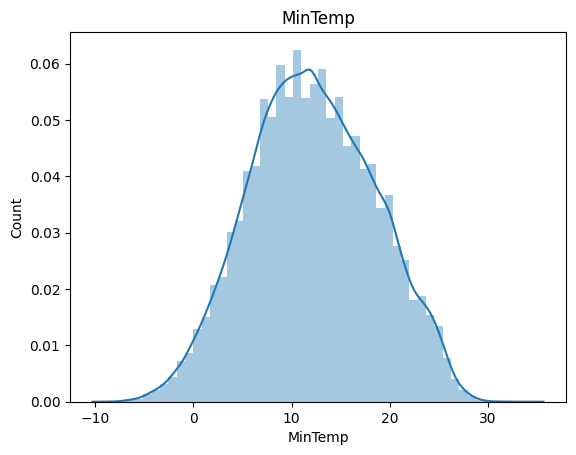

<Figure size 1000x1000 with 0 Axes>

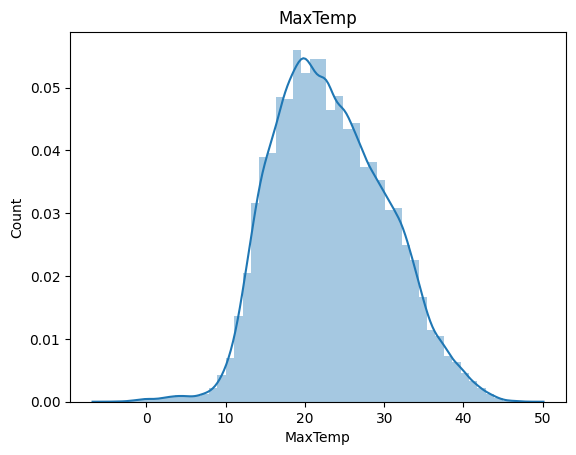

<Figure size 1000x1000 with 0 Axes>

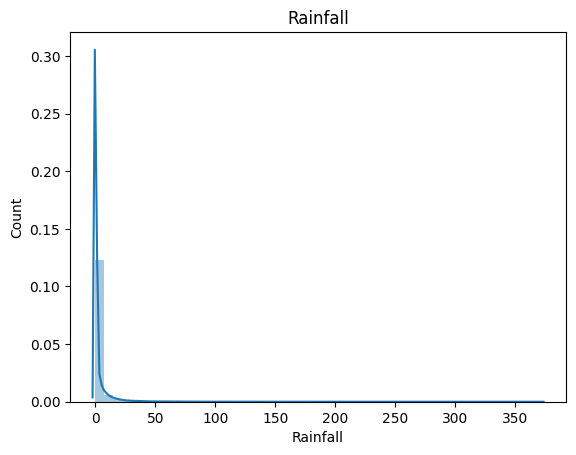

<Figure size 1000x1000 with 0 Axes>

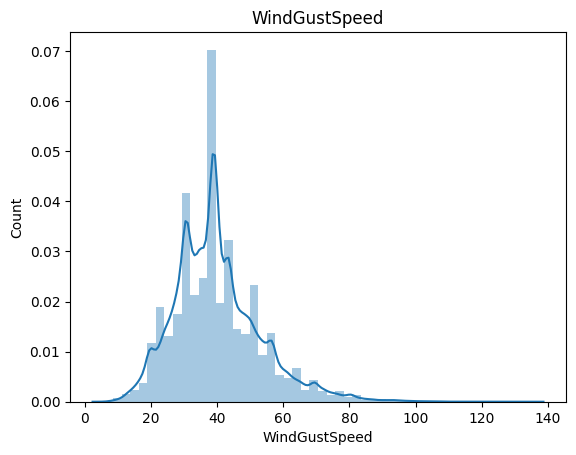

<Figure size 1000x1000 with 0 Axes>

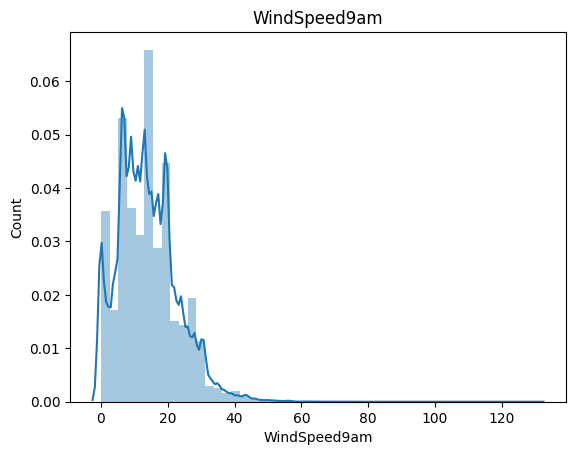

<Figure size 1000x1000 with 0 Axes>

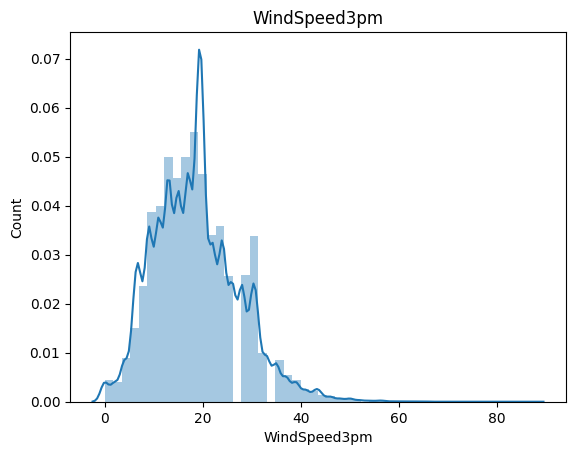

<Figure size 1000x1000 with 0 Axes>

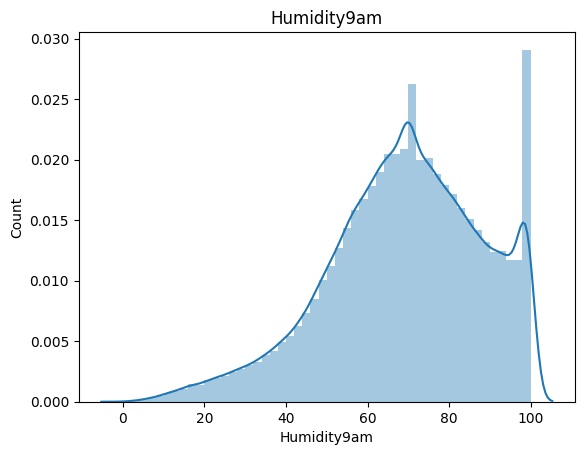

<Figure size 1000x1000 with 0 Axes>

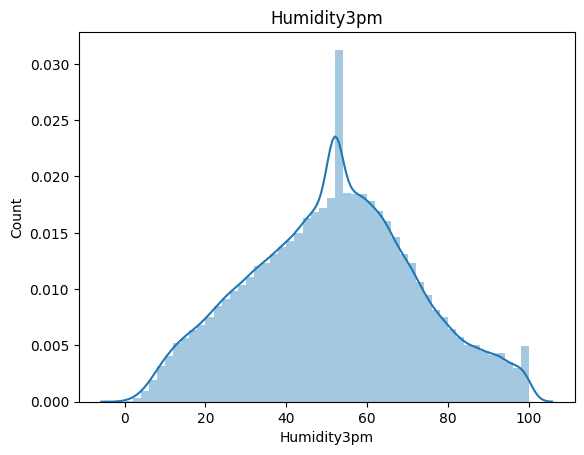

<Figure size 1000x1000 with 0 Axes>

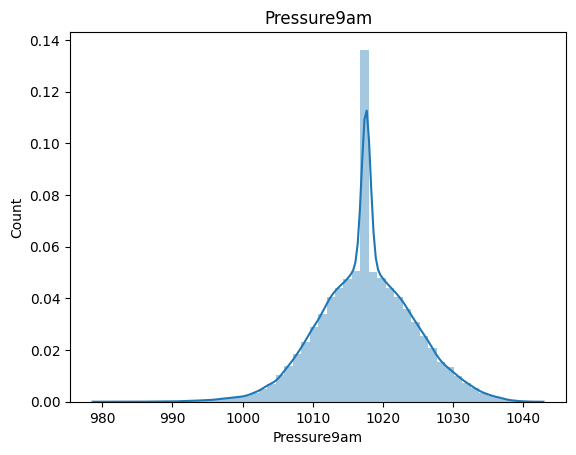

<Figure size 1000x1000 with 0 Axes>

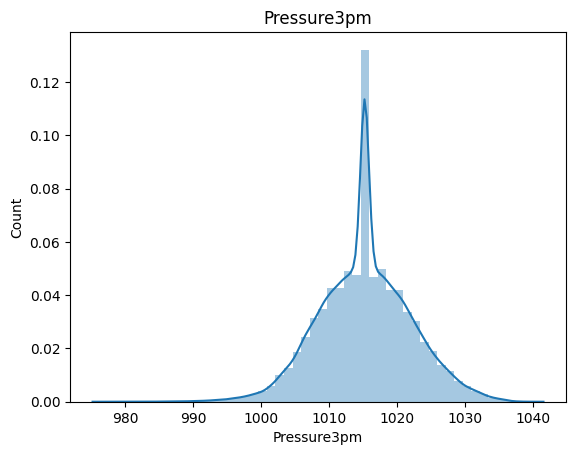

<Figure size 1000x1000 with 0 Axes>

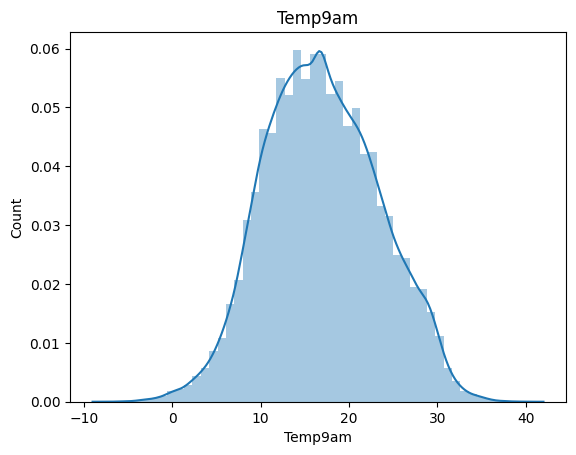

<Figure size 1000x1000 with 0 Axes>

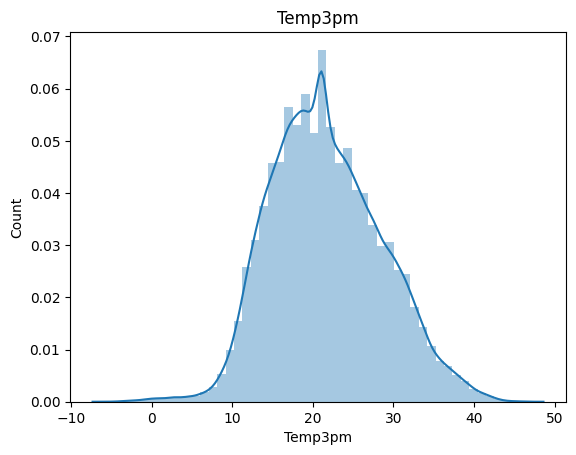

<Figure size 1000x1000 with 0 Axes>

In [22]:
for feature in continuous_feature:
    data=df2.copy()
    sns.distplot(df2[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(10,10))
    plt.show()

In [23]:
df2["RainToday"] = pd.get_dummies(df2["RainToday"], drop_first = True)
df2["RainTomorrow"] = pd.get_dummies(df2["RainTomorrow"], drop_first = True)


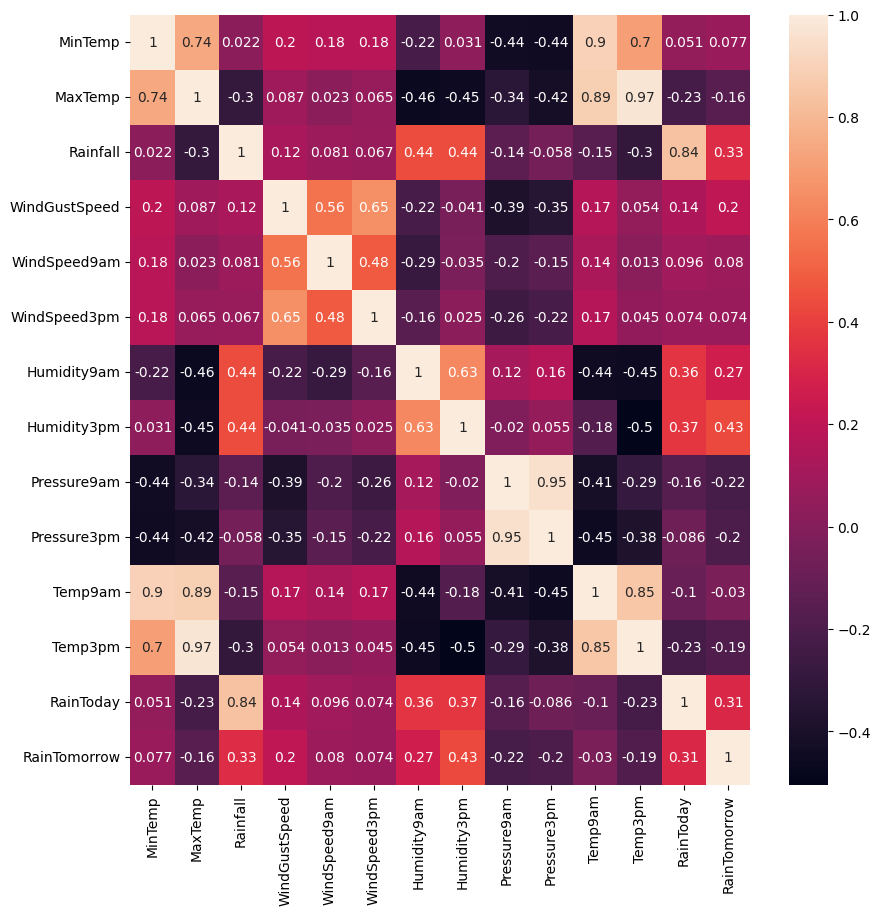

In [24]:
corrmat = df2.corr(method = "spearman")
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [25]:
loc_rain = df2.groupby(["Location"])["RainTomorrow"].value_counts().sort_values().unstack()

In [26]:
loc_rain

RainTomorrow,0,1
Location,,
Adelaide,2365,655
Albany,2105,891
Albury,2376,615
AliceSprings,2783,242
BadgerysCreek,2307,570
Ballarat,2238,779
Bendigo,2469,561
Brisbane,2427,705
Cairns,2029,935


In [27]:
loc_rain[1].sort_values(ascending = False).head()

Location
Portland        1095
Walpole          936
Cairns           935
Dartmoor         920
MountGambier     915
Name: 1, dtype: int64

In [28]:
loc_rain[1].sort_values(ascending = False).tail()

Location
Katherine       255
AliceSprings    242
Nhil            242
Woomera         198
Uluru           115
Name: 1, dtype: int64

In [29]:
#Feature Engineering
#Handling cv

In [30]:
df2["Date"] = pd.to_datetime(df2["Date"], format = "%Y-%m-%dT", errors = "coerce")

In [31]:
df2["Date_month"] = df2["Date"].dt.month
df2["Date_day"] = df2["Date"].dt.day

In [32]:
df2.drop(["Date"],axis=1,inplace=True)

In [33]:
df2.head(1)

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month,Date_day
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0,12,1


In [34]:
WindGustDir= pd.get_dummies(df2["WindGustDir"], drop_first = True)



In [35]:
WindGustDir

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
145455,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
145456,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
145457,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
WindDir9am= pd.get_dummies(df2["WindDir9am"], drop_first = True)


In [37]:
WindDir3pm= pd.get_dummies(df2["WindDir3pm"], drop_first = True)

In [38]:
df3 = pd.concat([df2,WindGustDir,WindDir9am,WindDir3pm], axis = 1)

In [39]:
df3.head(1)

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,...,0,0,0,0,0,0,0,0,1,0


In [40]:
df3.drop(["WindDir9am","WindDir3pm","WindGustDir"],axis=1,inplace=True)

In [41]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 62 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       140787 non-null  object 
 1   MinTemp        140787 non-null  float64
 2   MaxTemp        140787 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   WindGustSpeed  140787 non-null  float64
 5   WindSpeed9am   140787 non-null  float64
 6   WindSpeed3pm   140787 non-null  float64
 7   Humidity9am    140787 non-null  float64
 8   Humidity3pm    140787 non-null  float64
 9   Pressure9am    140787 non-null  float64
 10  Pressure3pm    140787 non-null  float64
 11  Temp9am        140787 non-null  float64
 12  Temp3pm        140787 non-null  float64
 13  RainToday      140787 non-null  uint8  
 14  RainTomorrow   140787 non-null  uint8  
 15  Date_month     140787 non-null  int64  
 16  Date_day       140787 non-null  int64  
 17  ENE            140787 non-nul

In [42]:
df3.drop(["Location"],axis=1,inplace=True)

In [43]:
df3.head(1)

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,0,0,0,0,0,0,0,0,1,0


Modelling pre requisite

In [44]:
X = df3.drop(["RainTomorrow"], axis=1)
Y = df3["RainTomorrow"]

In [ ]:
#Train Test split

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [66]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
123230,13.5,26.0,0.0,33.0,7.0,17.0,52.0,48.0,1018.7,1016.2,...,0,0,0,0,0,0,1,0,0,0
71385,16.0,30.0,0.0,43.0,31.0,11.0,24.0,22.0,1021.5,1019.8,...,0,0,0,0,0,0,0,0,0,0
44749,19.0,26.3,0.0,41.0,7.0,15.0,85.0,79.0,1017.0,1013.2,...,0,0,0,0,0,0,0,0,0,0
94829,14.7,27.2,0.0,50.0,13.0,22.0,48.0,47.0,1021.0,1018.7,...,0,0,0,0,0,0,0,0,0,0
27344,5.7,15.5,0.0,11.0,0.0,6.0,99.0,63.0,1008.5,1005.3,...,0,0,0,0,0,0,0,0,0,1


In [46]:
from sklearn.preprocessing import MinMaxScaler

# Create a scaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform the test data

X_test_scaled = scaler.transform(X_test)

In [47]:
y_train.value_counts()

0    87689
1    24940
Name: RainTomorrow, dtype: int64

In [48]:
#Handling Imbalanced Data With SMOTE

In [49]:
from imblearn.over_sampling import SMOTE

In [50]:
X_res,y_res = SMOTE().fit_resample(X_train_scaled,y_train)

In [51]:
y_res.value_counts()

0    87689
1    87689
Name: RainTomorrow, dtype: int64

Modelling


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score


In [63]:
logreg = LogisticRegression()
logreg.fit(X_res,y_res)
y_pred = logreg.predict(X_test_scaled)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[17369  4528]
 [ 1532  4729]]
0.7847858512678457
              precision    recall  f1-score   support

           0       0.92      0.79      0.85     21897
           1       0.51      0.76      0.61      6261

    accuracy                           0.78     28158
   macro avg       0.71      0.77      0.73     28158
weighted avg       0.83      0.78      0.80     28158



In [54]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_res,y_res)
y_pred2 = knn.predict(X_test_scaled)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[15864  6033]
 [ 2267  3994]]
0.7052347467859933
              precision    recall  f1-score   support

           0       0.87      0.72      0.79     21897
           1       0.40      0.64      0.49      6261

    accuracy                           0.71     28158
   macro avg       0.64      0.68      0.64     28158
weighted avg       0.77      0.71      0.73     28158



Tuning k value

In [67]:
# Define a range of k values
k_values = np.arange(1, 20)

# Initialize lists to store R^2 scores
acc_scores = []

# Iterate over each k value
for k in k_values:
    # Create a KNN classifier with the current k value
    knn_Classifier = KNeighborsClassifier(n_neighbors=k)

    # Fit the model on the training data
    knn_Classifier.fit(X_train_scaled, y_train)

    # Make predictions on the validation set
    y_pred_KO = knn_Classifier.predict(X_test_scaled)

    # Evaluate the R^2 score and store it
    r2 = accuracy_score(y_test,y_pred_KO)
    acc_scores.append(r2)



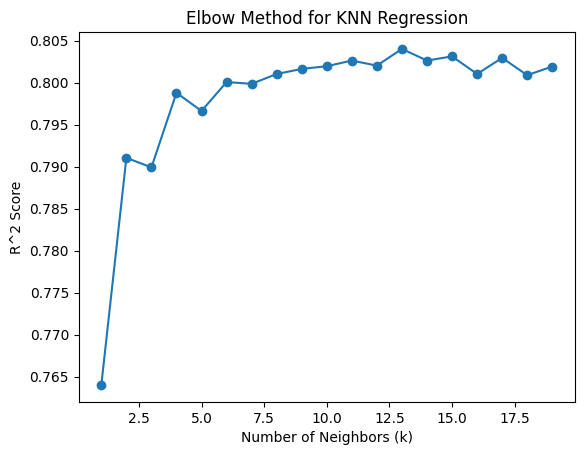

Best k value: 13


In [68]:
# Plot the accuracy scores for different k values
plt.plot(k_values, acc_scores, marker='o')
plt.title('Elbow Method for KNN Regression')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('R^2 Score')
plt.show()

# Identify the k value at the "elbow" point (where R^2 score stops improving significantly)
best_k = k_values[np.argmax(acc_scores)]
print(f"Best k value: {best_k}")


In [69]:
knnbest = KNeighborsClassifier(n_neighbors=13)
knnbest.fit(X_res,y_res)
y_pred_bestknn = knnbest.predict(X_test_scaled)
print(confusion_matrix(y_test,y_pred_bestknn))
print(accuracy_score(y_test,y_pred_bestknn))
print(classification_report(y_test,y_pred_bestknn))

[[15415  6482]
 [ 1915  4346]]
0.7017898998508417
              precision    recall  f1-score   support

           0       0.89      0.70      0.79     21897
           1       0.40      0.69      0.51      6261

    accuracy                           0.70     28158
   macro avg       0.65      0.70      0.65     28158
weighted avg       0.78      0.70      0.72     28158



In [57]:
nb = GaussianNB()
nb.fit(X_res,y_res)
y_pred_nb = nb.predict(X_test_scaled)
print(confusion_matrix(y_test,y_pred_nb))
print(accuracy_score(y_test,y_pred_nb))
print(classification_report(y_test,y_pred_nb))

[[15483  6414]
 [ 2114  4147]]
0.6971375807940905
              precision    recall  f1-score   support

           0       0.88      0.71      0.78     21897
           1       0.39      0.66      0.49      6261

    accuracy                           0.70     28158
   macro avg       0.64      0.68      0.64     28158
weighted avg       0.77      0.70      0.72     28158



In [58]:
dt = DecisionTreeClassifier()
dt.fit(X_res,y_res)
y_pred_dt = dt.predict(X_test_scaled)
print(confusion_matrix(y_test,y_pred_dt))
print(accuracy_score(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))

[[18029  3868]
 [ 2733  3528]]
0.7655728389800412
              precision    recall  f1-score   support

           0       0.87      0.82      0.85     21897
           1       0.48      0.56      0.52      6261

    accuracy                           0.77     28158
   macro avg       0.67      0.69      0.68     28158
weighted avg       0.78      0.77      0.77     28158



In [59]:
rf=RandomForestClassifier()
rf.fit(X_res,y_res)
y_pred3 = rf.predict(X_test_scaled)
print(confusion_matrix(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[19643  2254]
 [ 2162  4099]]
0.8431706797357766
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     21897
           1       0.65      0.65      0.65      6261

    accuracy                           0.84     28158
   macro avg       0.77      0.78      0.77     28158
weighted avg       0.84      0.84      0.84     28158



In [73]:
from sklearn.model_selection import GridSearchCV
# Define the hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [100,200],
    'max_depth': [10,20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}

# Create the RandomForestClassifier
rf_Classifier = RandomForestClassifier(random_state=42)

# Use grid search with cross-validation and R^2 score as the evaluation metric
grid_search = GridSearchCV(rf_Classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_res,y_res)

# Get the best hyperparameters
best_params = grid_search.best_params_
# Create a Random Forest Regressor with the best hyperparameters
best_rf_Classifier = RandomForestClassifier(**best_params, random_state=42)

# Fit the model on the training data
best_rf_Classifier.fit(X_res,y_res)

# Make predictions on the validation set
rf_y_val_pred = best_rf_Classifier.predict(X_test_scaled)

# Evaluate the R^2 score on the validation set
acc_r2 = accuracy_score(y_test, rf_y_val_pred)

print(f"Best hyperparameters: {best_params}")
print(f"R^2 Score on Validation Set: {acc_r2}")

Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
R^2 Score on Validation Set: 0.834824916542368


In [60]:
xgb = XGBClassifier()
xgb.fit(X_res,y_res)
y_pred4 = xgb.predict(X_test_scaled)
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

[[20522  1375]
 [ 2789  3472]]
0.852120178989985
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     21897
           1       0.72      0.55      0.63      6261

    accuracy                           0.85     28158
   macro avg       0.80      0.75      0.77     28158
weighted avg       0.84      0.85      0.85     28158

